In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns  

In [179]:
data=pd.read_csv("C:/Users\dorot\OneDrive\Pulpit\SDA\REGRESJA\weatherhistory.csv",parse_dates=True, index_col='Formatted Date')

In [180]:
data.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [181]:
data.shape

(96453, 11)

In [182]:
# for i in data.columns:
#     print(f"{data} have {data[i].nunique()} unique values")

In [183]:
# import datetime
# date1 = pd.Series(pd.date_range('2020-7-1 12:00:00', periods = 5))
# df = pd.DataFrame(dict(date_given = date1))
  
# df['month_of_date'] = df['date_given'].dt.month
# df

In [184]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


zmienną Loud Cover eliminujemy, ponieważ dla każdej obserwacji przyjmuje wartość zero, jej wariancja wyniesie również zero, nie wniesie nic do modelu.

In [186]:
data_df=data.drop('Loud Cover', axis=1)

In [187]:
data_df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [1]:
data_df.isnull().sum(axis = 0)

NameError: name 'data_df' is not defined

In [189]:
result = data_df.dtypes

In [68]:
result

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [190]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
dtypes: float64(7), object(3)
memory usage: 8.1+ MB


In [191]:
data_df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [71]:
data['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [192]:
data_df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [193]:
data_df.dropna(axis=0, inplace=True)

In [194]:
data_df.shape

(95936, 10)

In [195]:
data_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


Apparent Temperature (C)-zmienna endogeniczna, model ma na celu wyjaśnienie, jak pozostałe czynniki wpływają na temperaturę odczuwalną

In [196]:
data_df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [197]:
data_df.drop(['Daily Summary', 'Summary'], axis=1,inplace=True)

In [198]:
data_df.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [199]:
data_encoded_df = pd.get_dummies(
    data=data_df,
    drop_first=True,)
    

In [200]:
data_encoded_df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_snow
Formatted Date,,,,,,,,
2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0
2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0
2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0
2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0
2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0
...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00+02:00,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0
2016-09-09 20:00:00+02:00,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0
2016-09-09 21:00:00+02:00,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0


In [201]:
data_encoded_df.rename(columns = {'Precip Type_snow':'Snow'}, inplace = True)

In [83]:
data_encoded_df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow
Formatted Date,,,,,,,,
2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0
2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0
2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0
2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0
2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0
...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00+02:00,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0
2016-09-09 20:00:00+02:00,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0
2016-09-09 21:00:00+02:00,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0


In [202]:
data_encoded_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038,0.111658
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976,0.314947
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000,0.000000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000,0.000000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000,0.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000


In [203]:
from sklearn.model_selection import train_test_split

X = data_encoded_df.drop("Apparent Temperature (C)", axis=1)  # zmienne niezależne (features)
y = data_encoded_df["Apparent Temperature (C)"]  # zmienna zależna (target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [204]:
X_train.shape


(76748, 7)

In [87]:
y_train.shape


(76748,)

In [88]:
X_test.shape

(19188, 7)

In [89]:
y_test.shape

(19188,)

<AxesSubplot:>

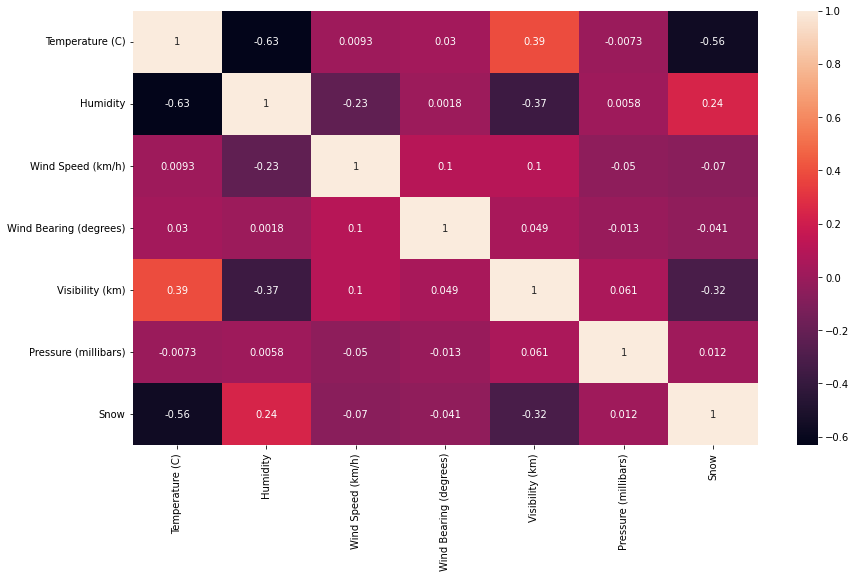

In [205]:
# correlation plot
plt.figure(figsize=(14, 8))
sns.heatmap(X_train.corr(), annot=True)

In [91]:
X_train.join(y_train).corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Snow,Apparent Temperature (C)
Temperature (C),1.000000,-0.632664,0.008746,0.029807,0.393749,-0.007231,-0.564045,0.992635
Humidity,-0.632664,1.000000,-0.225565,0.001930,-0.369861,0.005770,0.235186,-0.602817
Wind Speed (km/h),0.008746,-0.225565,1.000000,0.104438,0.101217,-0.050330,-0.069429,-0.057057
Wind Bearing (degrees),0.029807,0.001930,0.104438,1.000000,0.048803,-0.012855,-0.040739,0.028477
Visibility (km),0.393749,-0.369861,0.101217,0.048803,1.000000,0.060571,-0.318533,0.382511
Pressure (millibars),-0.007231,0.005770,-0.050330,-0.012855,0.060571,1.000000,0.011978,-0.001790
Snow,-0.564045,0.235186,-0.069429,-0.040739,-0.318533,0.011978,1.000000,-0.566285
Apparent Temperature (C),0.992635,-0.602817,-0.057057,0.028477,0.382511,-0.001790,-0.566285,1.000000


In [92]:
from statsmodels.api import OLS
import statsmodels.api as sm

X_train_statsmodels = sm.add_constant(X_train)
print(OLS(y_train, X_train_statsmodels).fit().summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.083e+06
Date:                      Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                              17:58:26   Log-Likelihood:            -1.1430e+05
No. Observations:                     76748   AIC:                         2.286e+05
Df Residuals:                         76740   BIC:                         2.287e+05
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

Interpreting the results of Linear Regression using OLS Summary

Last Updated : 14 Feb, 2022
This article is to tell you the whole interpretation of the regression summary table. There are many statistical softwares that are used for regression analysis like Matlab, Minitab, spss, R etc. but this article uses python. The Interpretation is the same for other tools as well. This article needs the basics of statistics including basic knowledge of regression, degrees of freedom, standard deviation, Residual Sum Of Squares(RSS), ESS, t statistics etc. 

In regression there are two types of variables i.e. dependent variable (also called explained variable) and independent variable (explanatory variable). 

The regression line used here is,

\hat{Y}_{i}=-3.2002+0.7529 X_{i}

The summary table of the regression is given below.

                                    OLS Regression Results                            
        ==============================================================================
        Dep. Variable:                      y   R-squared:                       0.669
        Model:                            OLS   Adj. R-squared:                  0.667
        Method:                 Least Squares   F-statistic:                     299.2
        Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.33e-37
        Time:                        16:19:34   Log-Likelihood:                -88.686
        No. Observations:                 150   AIC:                             181.4
        Df Residuals:                     148   BIC:                             187.4
        Df Model:                           1                                         
        Covariance Type:            nonrobust                                         
        ==============================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
        ------------------------------------------------------------------------------
        const         -3.2002      0.257    -12.458      0.000      -3.708      -2.693
        x1             0.7529      0.044     17.296      0.000       0.667       0.839
        ==============================================================================
        Omnibus:                        3.538   Durbin-Watson:                   1.279
        Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.589
        Skew:                           0.357   Prob(JB):                        0.166
        Kurtosis:                       2.744   Cond. No.                         43.4
        ==============================================================================
Dependent variable: Dependent variable is one that is going to depend on other variables. In this regression analysis Y is our dependent variable because we want to analyse the effect of X on Y.

Model: The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑ei2 ).

Number of observations: The number of observation is the size of our sample, i.e. N = 150.

Degree of freedom(df) of residuals: 
Degree of freedom is the number of independent observations on the basis of which the sum of squares is calculated.

D.f Residuals = 150 – (1+1) = 148

Degree of freedom(D.f) is calculated as,      

 Degrees of freedom,  D . f  = N – K

Where, N = sample size(no. of observations) and  K = number of variables + 1

Df of model: 
Df of model = K – 1 = 2 – 1 = 1 ,

Where, K = number of variables + 1

Constant term: The constant terms is the intercept of the regression line. From regression line (eq…1) the intercept is -3.002. In regression we omits some independent variables that do not have much impact on the dependent variable, the intercept tells the average value of these omitted variables and noise present in model.

Coefficient term: The coefficient term tells the change in Y for a unit change in X  i.e if X rises by 1 unit then Y rises by 0.7529. If you are familiar with derivatives then you can relate it as the rate of change of Y with respect to X .

Standard error of parameters: Standard error is also called the standard deviation. Standard error shows the sampling variability of these parameters. Standard error is calculated by as – 
 

Standard error of intercept term (b1): 

s e\left(b_{1}\right)=\sqrt{\left(\frac{\sum x_{i}^{2}}{n \sum\left(x_{i}-\bar{x}\right)^{2}}\right) \sigma^{2}}

Standard error of coefficient term(b2): 

s e\left(b_{2}\right)=\sqrt{\frac{\sigma^{2}}{\sum\left(x_{i}-\bar{x}\right)}}

Here,  σ2 is the Standard error of regression (SER) .  And σ2 is equal to RSS( Residual Sum Of Square i.e ∑ei2 ).

t – statistics: 
In theory, we assume that error term follows the normal distribution and because of this the parameters b1  and  b2 also have normal distributions with variance calculated in above section.

 That is , 

b1  ∼ N(B1, σb12)
b2   ∼ N(B2 , σb22)
Here B1 and B2  are true means of b1 and  b2.

t – statistics are calculated by assuming  following hypothesis – 

H0  : B2  = 0       ( variable X has no influence on Y)
Ha  : B2  ≠ 0      (X has significant impact on Y)
Calculations for t – statistics :          

                     t = ( b1 – B1 ) / s.e (b1)

 From summary table , b1 = -3.2002 and se(b1) = 0.257, So,

                   t = (-3.2002 – 0) / 0.257  = -12.458

Similarly,  b2 = 0.7529 , se(b2) = 0.044

                   t = (0.7529 – 0) / 0.044  = 17.296

p – values: 
In theory, we read that p-value is the probability of obtaining the t statistics at least as contradictory to H0  as calculated from assuming that the null hypothesis is true. In the summary table, we can see that P-value for both parameters is equal to 0. This is not exactly 0, but since we have very larger statistics (-12.458 and 17.296) p-value will be approximately 0.

If you know about significance levels then you can see that we can reject the null hypothesis at almost every significance level.

Confidence intervals:
There are many approaches to test the hypothesis, including the p-value approach mentioned above. The confidence interval approach is one of them. 5% is the standard significance level (∝) at which C.I’s are made. 

C.I for B1 is ( b1 – t∝/2 s.e(b1) , b1 + t∝/2 s.e(b1) )

Since ∝ = 5 %, b1 = -3.2002, s.e(b1) =0.257 , from t table , t0.025,148 = 1.655,

After putting values the C.I for B1 is approx. ( -3.708 , -2.693 ). Same can be done for b2 as well.

While calculating p values we rejected the null hypothesis we can see same in C.I as well. Since 0 does not lie in any of the intervals so we will reject the null hypothesis. 



 R – squared value: 
R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 66.9 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression.

F – statistic: 
F test tells the goodness of fit of a regression. The test is similar to the t-test or other tests we do for the hypothesis. The F – statistic is calculated as below –                    

F=\frac{R^{2} /(k-1)}{\left(1-R^{2}\right) /(n-k)}

Inserting the values of R2, n and k, F = (0.669/1) / (0.331/148) = 229.12.

You can calculate the probability of F >229.1 for 1 and 148 df, which comes to approx. 0. From this, we again reject the null hypothesis stated above. 

The remaining terms are not often used. Terms like Skewness and Kurtosis tells about the distribution of data. Skewness and kurtosis for the normal distribution are 0 and 3 respectively. Jarque-Bera test is used for checking whether an error has normal distribution or not.  

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's 
explained by an independent variable or variables in a regression model.

Im wyższa kurtoza tym większe skupienie zbiorowości wokół wartości średniej, co daje wyraz 
w większej smukłości krzywej rozkładu. Mała jej wartość daje efekt odwrotny czyli większy rozrzut wartości, 
słabą koncentrację i, co za tym idzie, spłaszczenie krzywej liczebności.

In [93]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn.metrics as metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Współczynnik regresji: {lin_reg.coef_}")
print(f"Wyraz wolny: {lin_reg.intercept_}")

Współczynnik regresji: [ 1.11558250e+00  8.52590949e-01 -9.81648303e-02  4.98012272e-04
 -5.62588477e-03  2.26621105e-04 -4.32628870e-01]
Wyraz wolny: -2.2385722147351927


In [94]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [95]:
regression_results(y_train,y_train_pred)

explained_variance:  0.99
r2:  0.99
MAE:  0.8438
MSE:  1.1511
RMSE:  1.0729


In [106]:
regression_results(y_test, y_test_pred)

explained_variance:  0.99
r2:  0.99
MAE:  0.8436
MSE:  1.1495
RMSE:  1.0721


RMSE interpretować

Model zwraca wartość  𝑅2  99% na zbiorze testowym i na zbiorze treningowym.
Innymi słowy 99% pierwotnej zmienności Y zostało wytłumaczone przez regresję, a 1% pozostało w zmienności resztowej. 


C:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test dla normalości reszt (residuals): \n Residual eror')

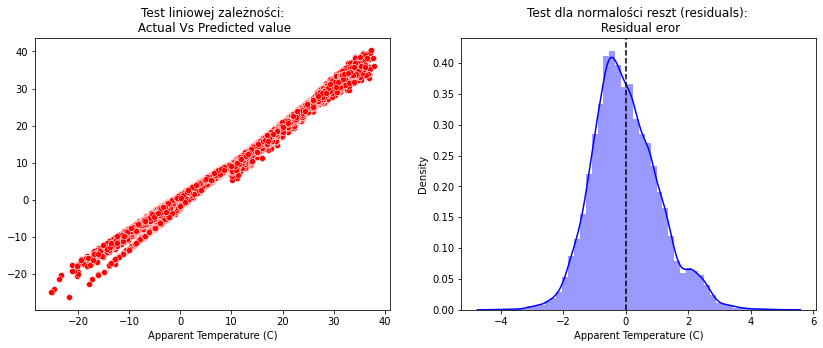

In [96]:
# Check for Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_test_pred, ax=ax, color="r")
ax.set_title("Test liniowej zależności:\n Actual Vs Predicted value")

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred), ax=ax, color="b")
ax.axvline((y_test - y_test_pred).mean(), color="k", linestyle="--")
ax.set_title("Test dla normalości reszt (residuals): \n Residual eror")

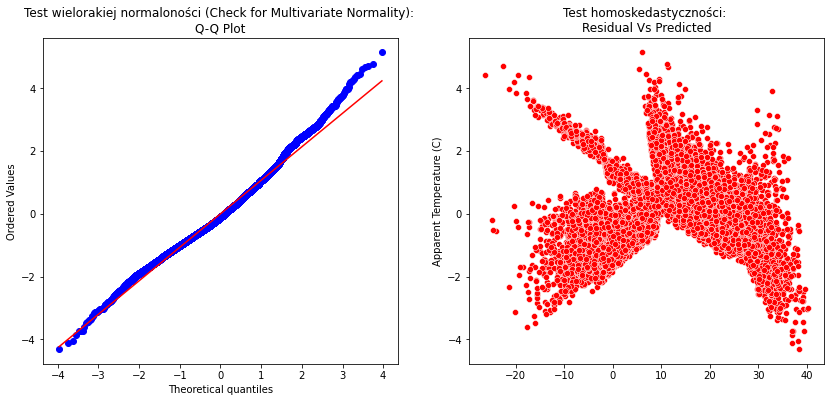

In [206]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r') 
ax[1].set_title('Test homoskedastyczności: \nResidual Vs Predicted');

Aby sprawdzić, czy nasz model ma właściwość homoskedastyczności, to znaczy sprawdzić, 
czy wariancja jego błędów jest stała, obliczymy błędy i wykreślimy je na wykresie.

Multivariate Normality–Multiple regression assumes that the residuals are 
normally distributed. No Multicollinearity—Multiple regression assumes that the 
independent variables are not highly correlated with each other. 
This assumption is tested using Variance Inflation Factor (VIF) values.

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

folds = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lm, X_train, y_train, cv=folds, scoring="neg_mean_squared_error")
scores

array([-1.14934053, -1.16233051, -1.17007961, -1.12836048, -1.14429736,
       -1.14762536, -1.14636004, -1.14482789, -1.14674606, -1.17405976])

In [208]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#folds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lm, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
scores

array([-1.14561143, -1.15661869, -1.13135851, -1.16951992, -1.15725309,
       -1.14358493, -1.1266885 , -1.14616109, -1.19333437, -1.1439666 ])

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

folds = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lm, X, y, cv=folds, scoring="neg_root_mean_squared_error")
scores

array([-1.07195607, -1.07223305, -1.07065436, -1.06387884, -1.08632953,
       -1.0724107 , -1.06450487, -1.07278865, -1.08143191, -1.07191328])

In [123]:
import numpy as np
np.abs(scores.mean())

1.1514097135895016

In [232]:
data_encoded_df.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Snow'],
      dtype='object')

In [233]:
from sklearn.model_selection import train_test_split

X = data_encoded_df.drop(["Apparent Temperature (C)","Visibility (km)","Wind Bearing (degrees)","Pressure (millibars)"],axis=1)  # zmienne niezależne (features)
y = data_encoded_df["Apparent Temperature (C)"]  # zmienna zależna (target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [234]:
from statsmodels.api import OLS
import statsmodels.api as sm

X_train_statsmodels = sm.add_constant(X_train)
print(OLS(y_train, X_train_statsmodels).fit().summary())

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.890e+06
Date:                      Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                              20:38:54   Log-Likelihood:            -1.1443e+05
No. Observations:                     76748   AIC:                         2.289e+05
Df Residuals:                         76743   BIC:                         2.289e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [235]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn.metrics as metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Współczynnik regresji: {lin_reg.coef_}")
print(f"Wyraz wolny: {lin_reg.intercept_}")

Współczynnik regresji: [ 1.11556442  0.89805647 -0.09756517 -0.42081628]
Wyraz wolny: -2.0170612359694733


In [236]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    # mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("explained_variance: ", round(explained_variance, 4))
    # print("mean_squared_log_error: ", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [237]:
regression_results(y_train,y_train_pred)

explained_variance:  0.9899
r2:  0.9899
MAE:  0.8452
MSE:  1.1549
RMSE:  1.0746


In [238]:
regression_results(y_test, y_test_pred)

explained_variance:  0.9899
r2:  0.9899
MAE:  0.8454
MSE:  1.1543
RMSE:  1.0744


C:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test dla normalości reszt (residuals): \n Residual eror')

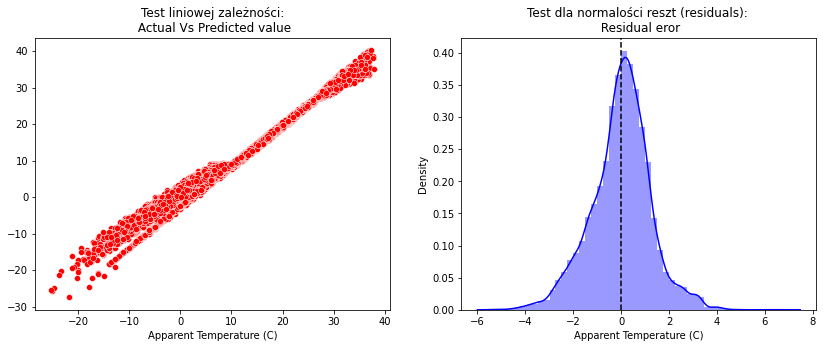

In [223]:
# Check for Linearity
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_test_pred, ax=ax, color="r")
ax.set_title("Test liniowej zależności:\n Actual Vs Predicted value")

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_test_pred), ax=ax, color="b")
ax.axvline((y_test - y_test_pred).mean(), color="k", linestyle="--")
ax.set_title("Test dla normalości reszt (residuals): \n Residual eror")

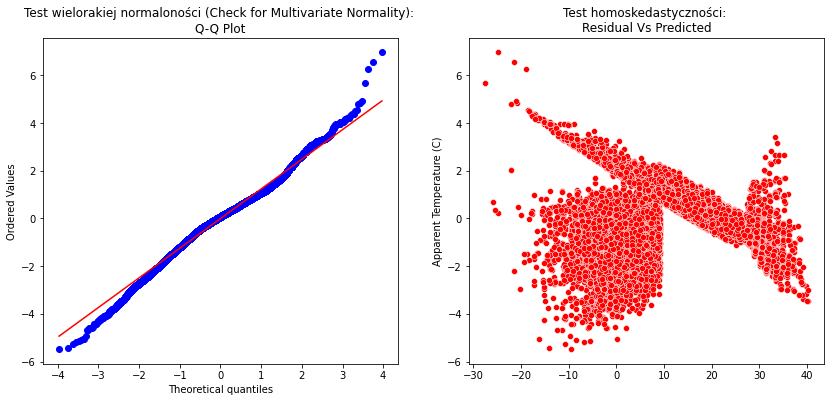

In [224]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_test_pred),fit=True,plot=ax[0])
ax[0].set_title('Test wielorakiej normaloności (Check for Multivariate Normality): \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_test_pred), x= y_test_pred, ax = ax[1],color='r') 
ax[1].set_title('Test homoskedastyczności: \nResidual Vs Predicted');

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

folds = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lm, X_train, y_train, cv=folds, scoring="neg_mean_squared_error")
scores

array([-1.15494826, -1.16628487, -1.17244747, -1.13212495, -1.14811427,
       -1.15149905, -1.14919817, -1.14890702, -1.15108579, -1.17668353])

In [226]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#folds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lm, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
scores

array([-1.57690414, -1.54224489, -1.54809821, -1.58075206, -1.54326219,
       -1.54886718, -1.55487677, -1.55156251, -1.64240359, -1.56883616])

In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

folds = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lm, X, y, cv=folds, scoring="neg_root_mean_squared_error")
scores

array([-1.25675079, -1.24094877, -1.25534348, -1.23644431, -1.25712412,
       -1.24400262, -1.24835058, -1.24629219, -1.26584497, -1.25663856])

In [228]:
import numpy as np
np.abs(scores.mean())

1.250774040910628